<a href="https://colab.research.google.com/github/HMBinara/ML_Project/blob/main/Big_M_S_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics


Upload file


In [18]:
from google.colab import files
uploaded = files.upload()

train_data = pd.read_csv('Train.csv')


Saving Train.csv to Train.csv


Data Preprocessing

In [19]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [20]:
#number of data points &number of features
train_data.shape

(8523, 12)

In [21]:
#geting some the information about tha dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


#Catogarical Features:
  -Item_Identifier

  -Item_Fat_Content

  -Item_Type

  -Outlet_Identifier

  -Outlet_Size

  -Outlet_Lo_Type
  
  -Item_Outlet_Sales


In [22]:
#Cheaking for missing Values
train_data.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


#Handling Missing Values

Mean --->averages Values

Mode --->Most represent value

In [23]:
#mean Value of 'item weight' colums
train_data['Item_Weight'].mean()

np.float64(12.857645184135976)

In [24]:
#filling the missing values in "Iteam_Weight" colums with "Mean"value
train_data['Item_Weight'].fillna(train_data['Item_Weight'].mean(), inplace = True)

/tmp/ipython-input-3281473055.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Item_Weight'].fillna(train_data['Item_Weight'].mean(), inplace = True)


In [25]:
train_data.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


Replacing the missing Value in "Outlet_Size" with mode

In [26]:
mode_of_outlet_size = train_data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
print(mode_of_outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [27]:
missing_value = train_data['Outlet_Size'].isnull()
print(missing_value)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [28]:
train_data.loc[missing_value, 'Outlet_Size'] = train_data.loc[missing_value, 'Outlet_Type'].apply(lambda x: mode_of_outlet_size[x])

In [29]:
train_data.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


##Data Analysis

In [30]:
#statical measures abaout the Data
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Numerical Features

In [31]:
sns.set()

<Figure size 600x600 with 0 Axes>

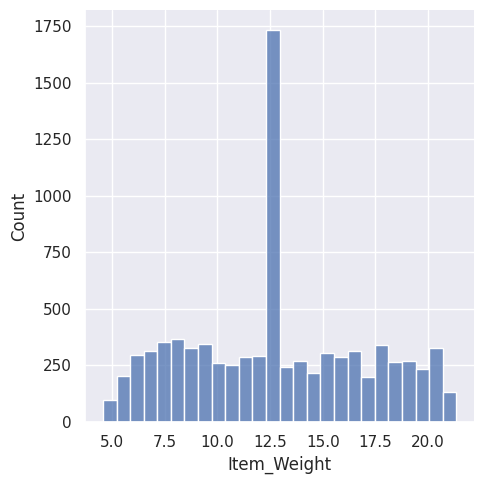

In [32]:
#Item_weight distrubution
plt.figure(figsize = (6,6))
sns.displot(train_data['Item_Weight'])
plt.show()

<Figure size 600x600 with 0 Axes>

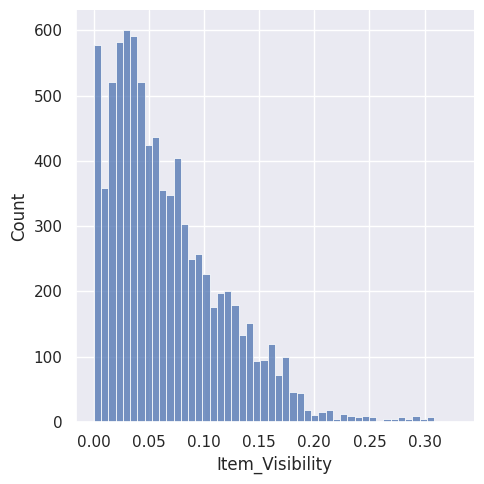

In [33]:
#Item_Visibility distrubution
plt.figure(figsize = (6,6))
sns.displot(train_data['Item_Visibility'])
plt.show()

<Figure size 600x600 with 0 Axes>

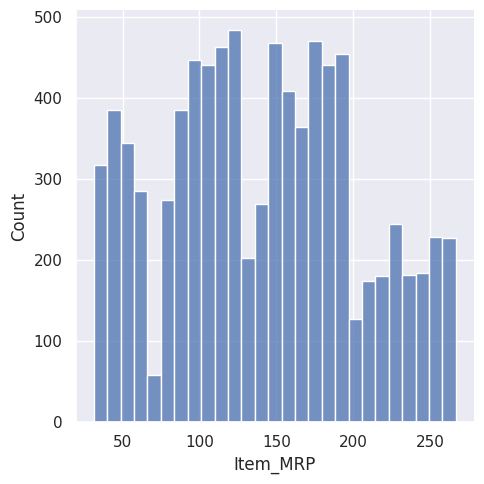

In [34]:
#Item_MRP distrubution
plt.figure(figsize = (6,6))
sns.displot(train_data['Item_MRP'])
plt.show()

<Figure size 600x600 with 0 Axes>

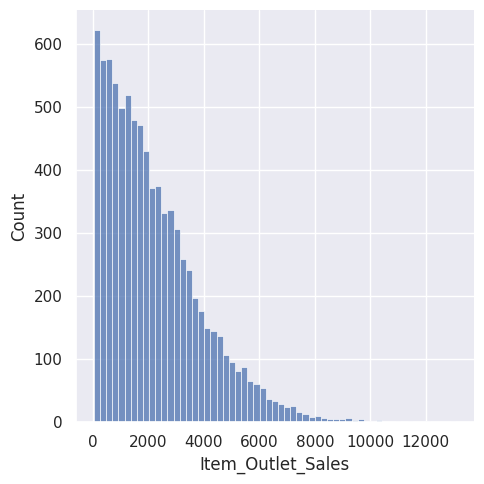

In [35]:
#Item_Outlet_Sales distrubution
plt.figure(figsize = (6,6))
sns.displot(train_data['Item_Outlet_Sales'])
plt.show()

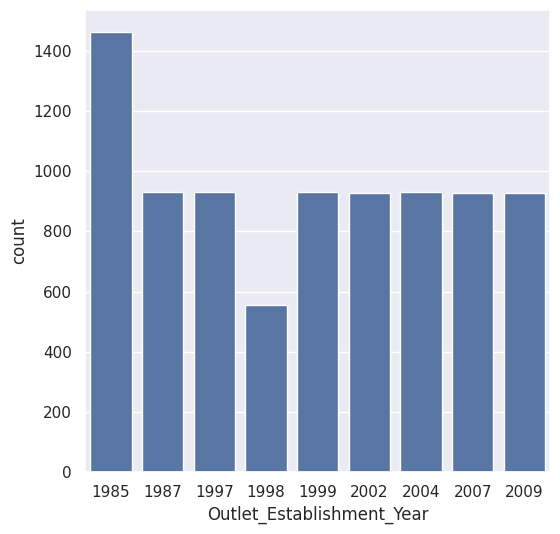

In [36]:
#Outlet_Establishment_Year column
plt.figure(figsize = (6,6))
sns.countplot(x = 'Outlet_Establishment_Year', data = train_data)
plt.show()

Caregorical Features

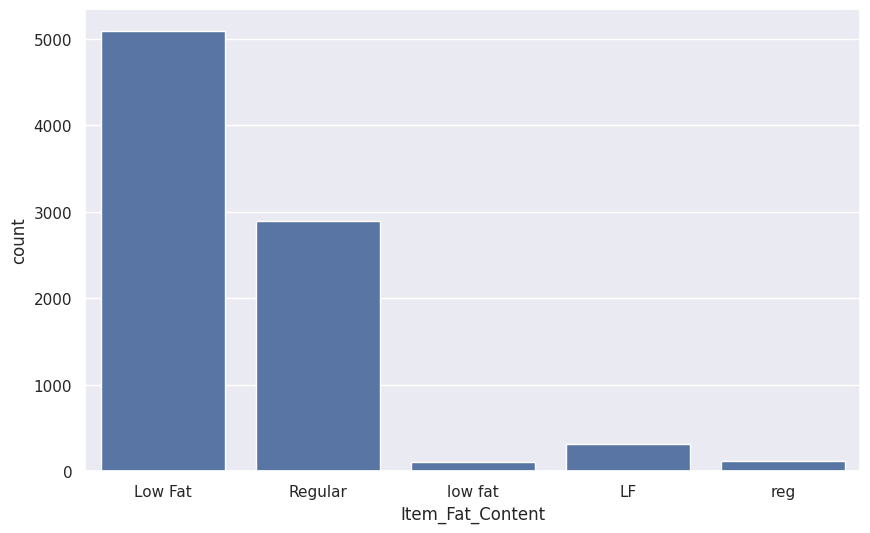

In [37]:
#Item_Fat_Content column
plt.figure(figsize = (10,6))
sns.countplot(x = 'Item_Fat_Content', data = train_data)
plt.show()


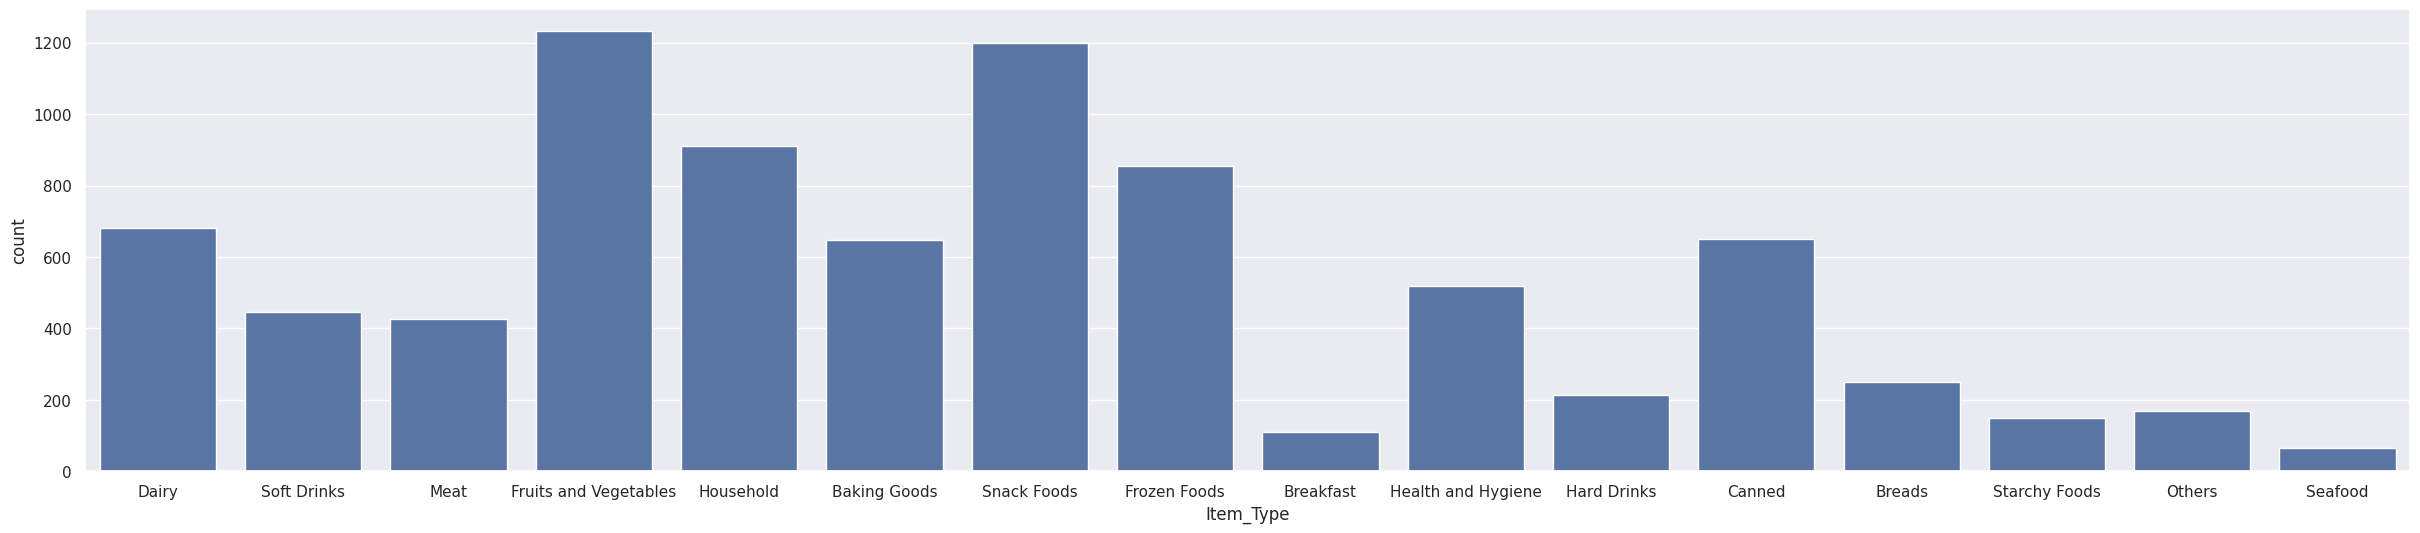

In [38]:
#Item_Type column
plt.figure(figsize = (30,6))
sns.countplot(x = 'Item_Type', data = train_data)
plt.show()

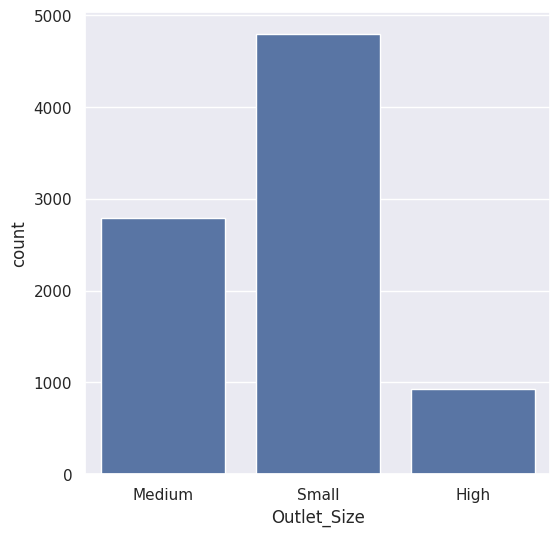

In [39]:
#Outlet_Size column
plt.figure(figsize = (6,6))
sns.countplot(x = 'Outlet_Size', data = train_data)
plt.show()

Data Pre Processing

In [40]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [41]:
train_data['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


In [42]:
train_data.replace({'Item_Fat_Content': {'low fat': 'Low Fat','LF' : 'Low Fat', 'reg': 'Regular' }},inplace =True)

In [43]:
train_data['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


Label Encoding

In [44]:
encoder = LabelEncoder()

In [48]:
train_data['Item_Identifier'] = encoder.fit_transform(train_data['Item_Identifier'])
train_data['Item_Fat_Content'] = encoder.fit_transform(train_data['Item_Fat_Content'])
train_data['Item_Type'] = encoder.fit_transform(train_data['Item_Type'])
train_data['Outlet_Identifier'] = encoder.fit_transform(train_data['Outlet_Identifier'])
train_data['Outlet_Size'] = encoder.fit_transform(train_data['Outlet_Size'])
train_data['Outlet_Location_Type'] = encoder.fit_transform(train_data['Outlet_Location_Type'])
train_data['Outlet_Type'] = encoder.fit_transform(train_data['Outlet_Type'])




In [49]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,2540
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,422
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,1639
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,670
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,865


Spliting features and Target

In [50]:
x = train_data.drop(columns = 'Item_Outlet_Sales', axis = 1)
y = train_data['Item_Outlet_Sales']

Spliting data into Training data & Testing Data

In [51]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state = 2)

In [52]:
print(x.shape,x_train.shape,x_test.shape)

(8523, 11) (6818, 11) (1705, 11)


ML Model Training

Using XGBRegressor

In [59]:
regressor = XGBRegressor()
regressor.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

Evaluation

In [60]:
#prediction on training data
training_data_prediction = regressor.predict(x_train)

In [61]:
#R squared Value
r2_train = metrics.r2_score(y_train, training_data_prediction)
print('R squared Value : ', r2_train)

R squared Value :  0.883436918258667


In [62]:
#prediction on test data
test_data_prediction = regressor.predict(x_test)

In [63]:
#R squared Value
r2_test = metrics.r2_score(y_test, test_data_prediction)
print('R squared Value : ', r2_test)

R squared Value :  0.5791118144989014
